## Data loading

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_csv('housing_price_dataset.csv')

In [3]:
data.shape[0]

50000

In [4]:
data.columns

Index(['SquareFeet', 'Bedrooms', 'Bathrooms', 'Neighborhood', 'YearBuilt',
       'Price'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SquareFeet    50000 non-null  int64  
 1   Bedrooms      50000 non-null  int64  
 2   Bathrooms     50000 non-null  int64  
 3   Neighborhood  50000 non-null  object 
 4   YearBuilt     50000 non-null  int64  
 5   Price         50000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 2.3+ MB


In [6]:
data.head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065


In [7]:
data.dropna(inplace= True)

In [8]:
data = data.drop_duplicates()

In [9]:
data.dtypes

SquareFeet        int64
Bedrooms          int64
Bathrooms         int64
Neighborhood     object
YearBuilt         int64
Price           float64
dtype: object

In [10]:
data['Neighborhood'].value_counts()

Neighborhood
Suburb    16721
Rural     16676
Urban     16603
Name: count, dtype: int64

In [11]:
data['Price'].min()

-36588.16539749279

In [12]:
data['Price'].max()

492195.2599720151

In [13]:
data['Price'].mean()

224827.32515099045

In [14]:
data['YearBuilt'].min()

1950

In [15]:
data['YearBuilt'].max()

2021

In [16]:
x= data.drop(columns=['Price'],axis=1)
y=data['Price']

In [17]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [18]:
train_data = x_train.join(y_train)

In [19]:
train_data.head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
16144,2151,3,1,Rural,1989,173704.498323
9524,2739,3,1,Suburb,1973,262833.496535
28755,2555,2,3,Rural,1966,256585.294784
24580,2466,3,2,Urban,1990,279387.380535
5880,1901,5,3,Suburb,1962,251515.299755


array([[<Axes: title={'center': 'SquareFeet'}>,
        <Axes: title={'center': 'Bedrooms'}>],
       [<Axes: title={'center': 'Bathrooms'}>,
        <Axes: title={'center': 'YearBuilt'}>],
       [<Axes: title={'center': 'Price'}>, <Axes: >]], dtype=object)

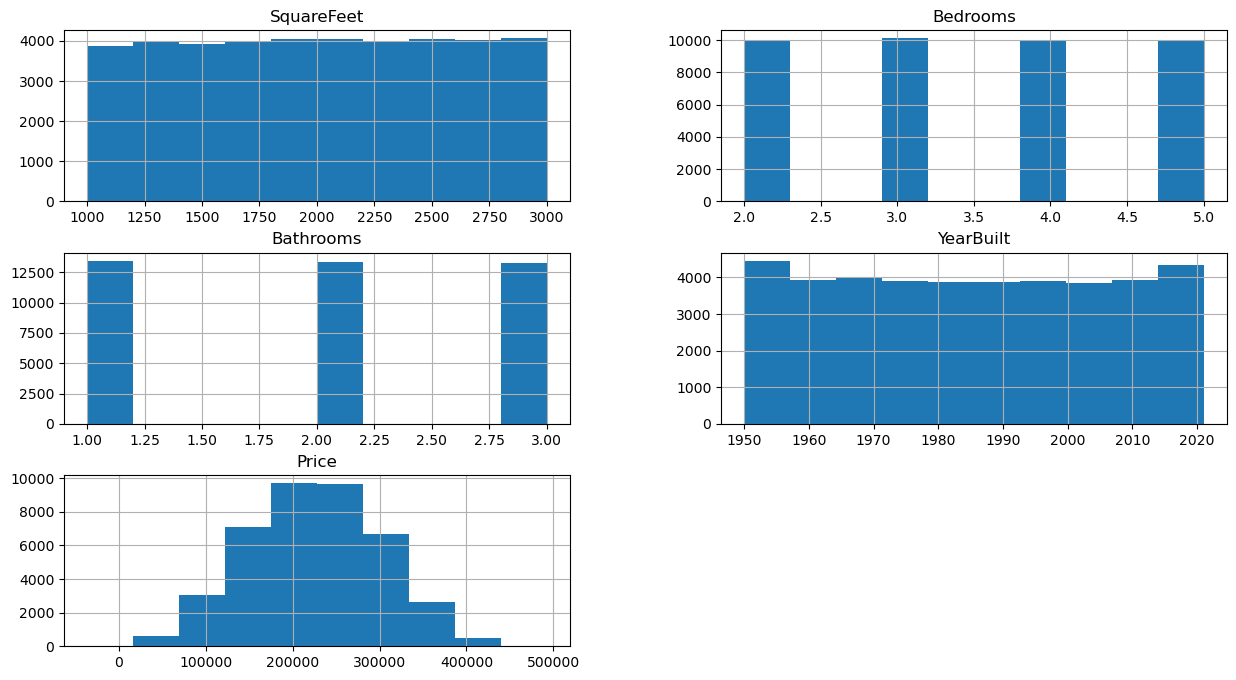

In [20]:
train_data.hist(figsize=(15, 8))

In [21]:
data_for_train=train_data.drop(columns=['Neighborhood'], axis=1)

<Axes: >

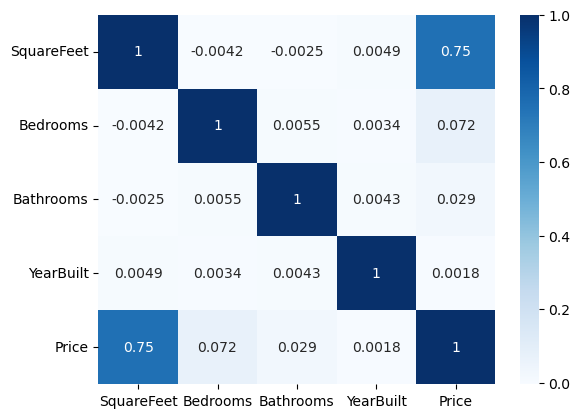

In [22]:
sns.heatmap(data_for_train.corr(), annot= True, cmap='Blues')

In [23]:
train_data.Neighborhood.value_counts()

Neighborhood
Suburb    13386
Urban     13333
Rural     13281
Name: count, dtype: int64

In [24]:
train_data=train_data.join(pd.get_dummies(train_data.Neighborhood).astype(int)).drop(['Neighborhood'], axis=1)

<Axes: >

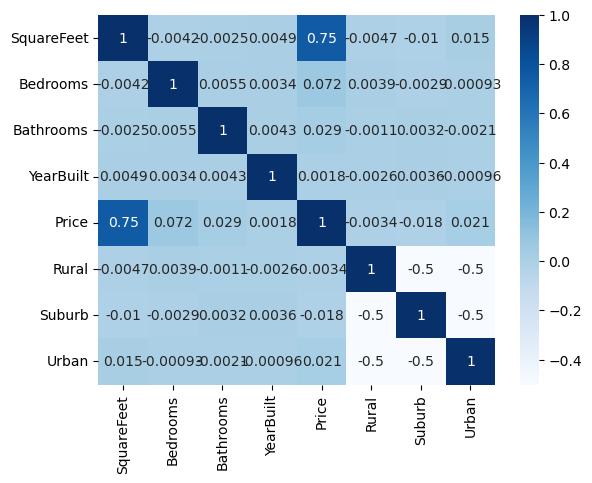

In [25]:
sns.heatmap(train_data.corr(), annot= True, cmap='Blues')

<Axes: xlabel='SquareFeet', ylabel='Bathrooms'>

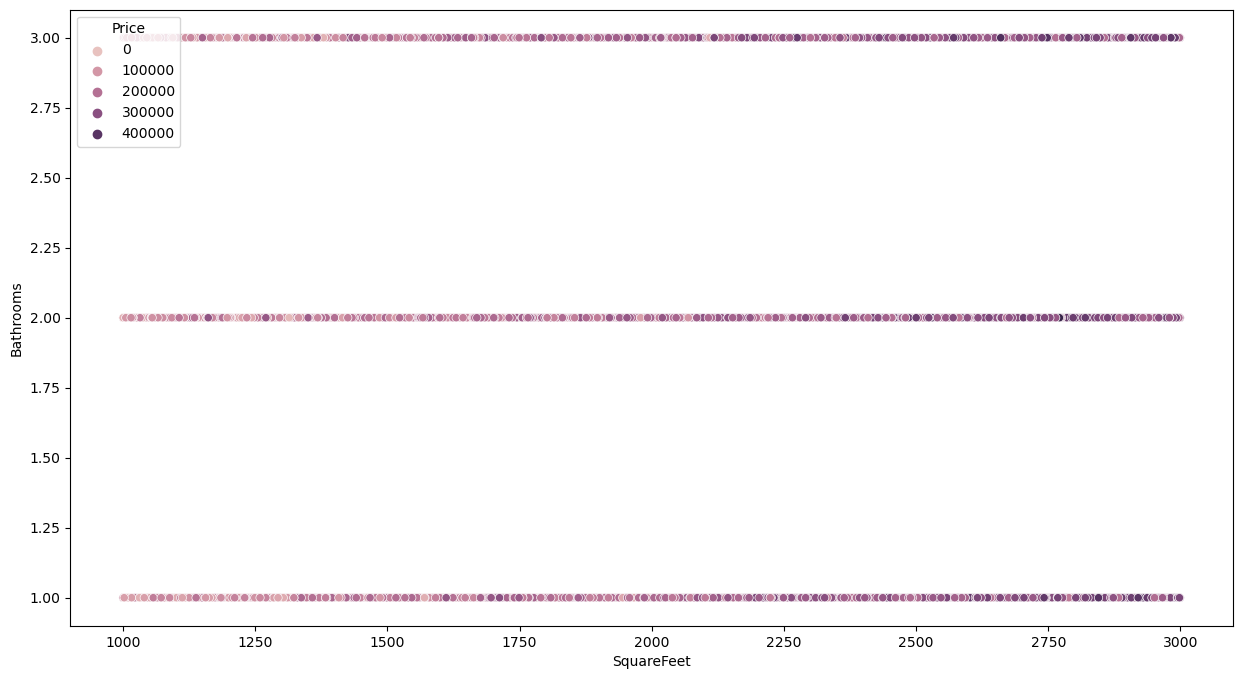

In [56]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x='SquareFeet', y='Bathrooms', data=train_data, hue='Price')

In [27]:
train_data['bedrooms_ratio'] = train_data['Bedrooms']/train_data['Bathrooms']

In [28]:
train_data.head()

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price,Rural,Suburb,Urban,bedrooms_ratio
16144,2151,3,1,1989,173704.498323,1,0,0,3.000000
9524,2739,3,1,1973,262833.496535,0,1,0,3.000000
28755,2555,2,3,1966,256585.294784,1,0,0,0.666667
24580,2466,3,2,1990,279387.380535,0,0,1,1.500000
5880,1901,5,3,1962,251515.299755,0,1,0,1.666667


In [36]:
from sklearn.linear_model import LinearRegression

x_train, y_train = train_data.drop(['Price'], axis=1), train_data['Price']

reg = LinearRegression()

reg.fit(x_train, y_train)

LinearRegression()

In [39]:
reg.score(x_train, y_train)

0.5713606410074891

In [42]:
from sklearn.ensemble import RandomForestRegressor

Forest= RandomForestRegressor()

Forest.fit(x_train, y_train)

RandomForestRegressor()

In [44]:
Forest.score(x_train, y_train)

0.9316019669881043

In [51]:
from sklearn.model_selection import GridSearchCV

Forest = RandomForestRegressor()

param_grid = {
    "n_estimators" : [3, 10, 30],
    "max_features" : [2, 3, 4, 5]
        }

grid_search= GridSearchCV(Forest, param_grid, cv=5,
                         scoring="neg_mean_squared_error",
                         return_train_score=True)

grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [2, 3, 4, 5],
                         'n_estimators': [3, 10, 30]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [53]:
best_forest=grid_search.best_estimator_

In [54]:
best_forest.score(x_train, y_train)

0.9255363418231759